Preprocesamiento de la Imagen

In [29]:
#Importar librerías
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# Cargar la imagen del cómic
image = cv2.imread('data\input\Comic6_010.jpg')

# Convertir a escala de grises
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar umbralización
_, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)


 Detección de Contornos

In [37]:
# Encontrar contornos
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Mostrar el área de cada contorno detectado para decidir un valor adecuado de min_area
for i, cnt in enumerate(contours):
    area = cv2.contourArea(cnt)
    print(f'Contorno {i}: Área = {area} píxeles cuadrados')

# Filtrar contornos
min_area = 1000000  # Ajustar según el tamaño mínimo de las viñetas
viñetas = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

# Crear una copia de la imagen para dibujar los contornos
output = image.copy()


Contorno 0: Área = 0.0 píxeles cuadrados
Contorno 1: Área = 0.0 píxeles cuadrados
Contorno 2: Área = 0.0 píxeles cuadrados
Contorno 3: Área = 0.0 píxeles cuadrados
Contorno 4: Área = 0.0 píxeles cuadrados
Contorno 5: Área = 0.0 píxeles cuadrados
Contorno 6: Área = 0.0 píxeles cuadrados
Contorno 7: Área = 0.0 píxeles cuadrados
Contorno 8: Área = 0.0 píxeles cuadrados
Contorno 9: Área = 0.0 píxeles cuadrados
Contorno 10: Área = 0.0 píxeles cuadrados
Contorno 11: Área = 0.0 píxeles cuadrados
Contorno 12: Área = 0.0 píxeles cuadrados
Contorno 13: Área = 0.0 píxeles cuadrados
Contorno 14: Área = 0.0 píxeles cuadrados
Contorno 15: Área = 0.0 píxeles cuadrados
Contorno 16: Área = 0.0 píxeles cuadrados
Contorno 17: Área = 0.0 píxeles cuadrados
Contorno 18: Área = 0.0 píxeles cuadrados
Contorno 19: Área = 0.0 píxeles cuadrados
Contorno 20: Área = 0.0 píxeles cuadrados
Contorno 21: Área = 0.0 píxeles cuadrados
Contorno 22: Área = 0.0 píxeles cuadrados
Contorno 23: Área = 0.0 píxeles cuadrados
Co

Segmentación de Viñetas

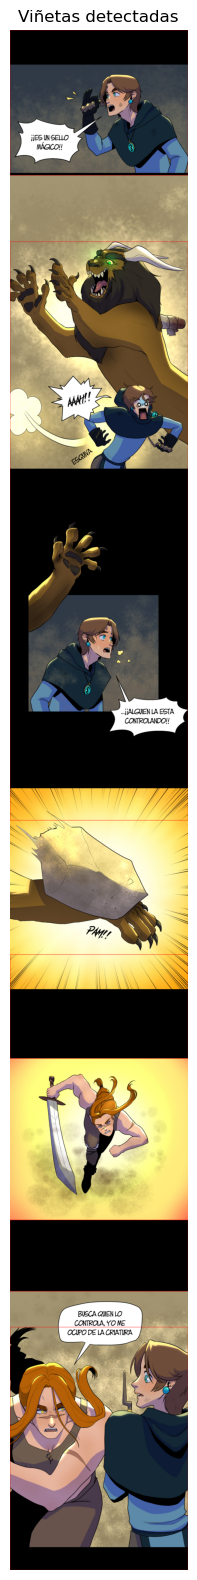

In [38]:
# Dibujar contornos y extraer viñetas
for i, cnt in enumerate(viñetas):
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(output, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Dibujar en rojo
    viñeta = image[y:y + h, x:x + w]
    # Guardar cada viñeta como un archivo de imagen separado
    cv2.imwrite(f'data/output/divide_images/panel_{i}.jpg', viñeta)

# Convertir la imagen de BGR a RGB para mostrar con matplotlib
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

# Mostrar la imagen con los contornos dibujados usando matplotlib
plt.figure(figsize=(30, 20))
plt.imshow(output_rgb)
plt.title('Viñetas detectadas')
plt.axis('off')  # Ocultar los ejes
plt.show()
